 ## Investigate a Dataset : 
 data source : *(https://www.kaggle.com/c/titanic/data)*
 ###  Background Information : 
RMS *Titanic* was a British passenger liner that sank in the North Atlantic Ocean in the early morning hours of 15 April 1912, after it collided with an iceberg during her maiden voyage from Southampton to New York City. There were an estimated 2,224 passengers and crew aboard the ship, and more than 1,500 died, making it one of the deadliest commercial peacetime maritime disasters in modern history.
 *[Description from Wikipedia](https://en.wikipedia.org/wiki/RMS_Titanic)*
### Dataset :
The dataset contains demographics and passenger information from 891 of the 2,224 passengers and crew on board the *Titanic*. 
### Questions for Investigation :
Although there were some elements of luck involved in surviving the sinking, it is highly possible that some groups of people were more  likely to survive than others. The questions raised for this investigation are:
* Was social status a factor in survival? (Were upper-class passengers more likely to survive?)
* Did women and children have a better chance to survive?
* What was the age distribution in survival?
* Did passengers by themselves or with their families aboard tend to survive?



## import libraries : 

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns
from matplotlib import rcParams
rcParams['figure.figsize'] = 11.7,8.27
plt.style.use('ggplot')
df = pd.read_csv("titanic.csv")

## The first 5 rows of data :

In [4]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


## Statistical summary:

In [5]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


## Delete unnecessary columns :

In [6]:
df.drop(['PassengerId','Name','Ticket','Cabin'], axis=1,inplace=True)

In [7]:
df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S


### note :
#### We now have eight features that we use to display insights, but some columns have missing data ("Age" and "embarkd" and we need to fix that.


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Sex       891 non-null    object 
 3   Age       714 non-null    float64
 4   SibSp     891 non-null    int64  
 5   Parch     891 non-null    int64  
 6   Fare      891 non-null    float64
 7   Embarked  889 non-null    object 
dtypes: float64(2), int64(4), object(2)
memory usage: 55.8+ KB


### Distribution of features :

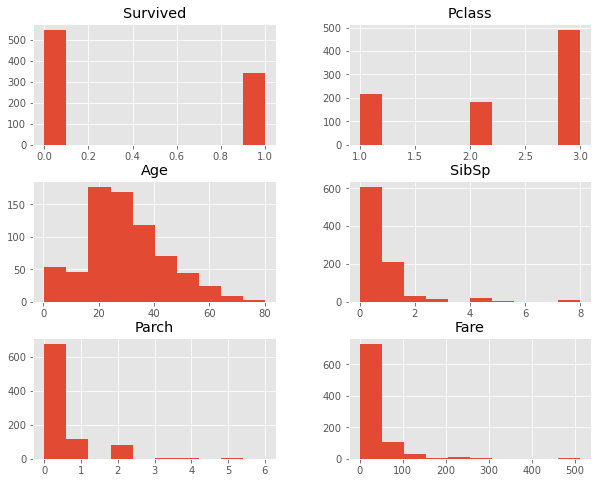

In [9]:
df.hist(figsize=(10,8));

### replace Null values in dataframe (mean),"Age" :

In [10]:
df.fillna(df.mean(),inplace = True)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Sex       891 non-null    object 
 3   Age       891 non-null    float64
 4   SibSp     891 non-null    int64  
 5   Parch     891 non-null    int64  
 6   Fare      891 non-null    float64
 7   Embarked  889 non-null    object 
dtypes: float64(2), int64(4), object(2)
memory usage: 55.8+ KB


### Fixing column "Embarked" by deleting two values from all the features, so that the number of values is equal :

In [11]:
df[df.Embarked.isnull()]

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
61,1,1,female,38.0,0,0,80.0,NaN
829,1,1,female,62.0,0,0,80.0,NaN


### Now our data is clean :

In [12]:
df.dropna(inplace = True)
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 889 entries, 0 to 890
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  889 non-null    int64  
 1   Pclass    889 non-null    int64  
 2   Sex       889 non-null    object 
 3   Age       889 non-null    float64
 4   SibSp     889 non-null    int64  
 5   Parch     889 non-null    int64  
 6   Fare      889 non-null    float64
 7   Embarked  889 non-null    object 
dtypes: float64(2), int64(4), object(2)
memory usage: 62.5+ KB


### Extracting insights from data :

In [13]:
survived = df.Survived == True
died = df.Survived == False

#### Distribution of the 'survived' and 'died' According to the 'Fare' (Passenger fare) :

In [14]:
df.Fare[survived].mean()

48.209498235294106

In [15]:
df.Fare[died].mean()


22.117886885245877

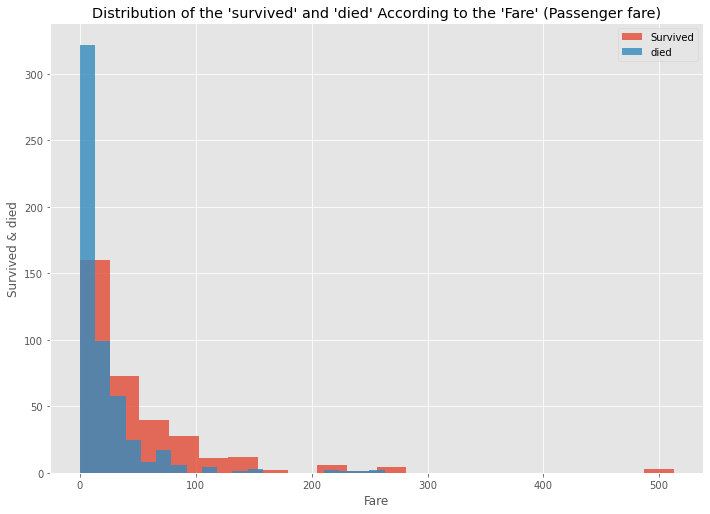

In [16]:
df.Fare[survived].hist(alpha=0.8,bins=20, label='Survived')
df.Fare[died].hist(alpha=0.8,bins=20,label='died');
plt.xlabel('Fare')
plt.ylabel('Survived & died')
plt.title("Distribution of the 'survived' and 'died' According to the 'Fare' (Passenger fare)")
plt.legend();                   
                   

### Distribution of the 'survived' and 'died' According to the 'Pclass' (Ticket class) :
#### 1 = 1st, 2 = 2nd, 3 = 3rd

In [17]:
df.groupby("Pclass").Survived.mean()

Pclass
1    0.626168
2    0.472826
3    0.242363
Name: Survived, dtype: float64

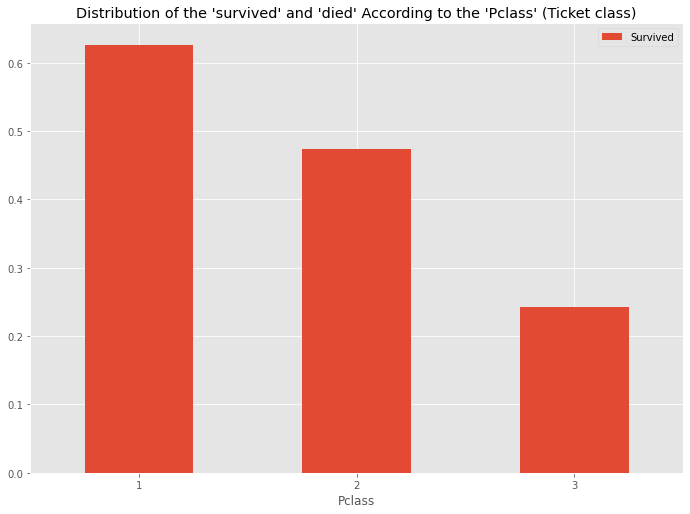

In [18]:
df.groupby("Pclass").Survived.mean().plot(kind='bar',label='Survived').set(title="Distribution of the 'survived' and 'died' According to the 'Pclass' (Ticket class)")
plt.legend()
plt.xticks(rotation=0);


### Distribution of the 'survived' and 'died' According to the 'Age' :

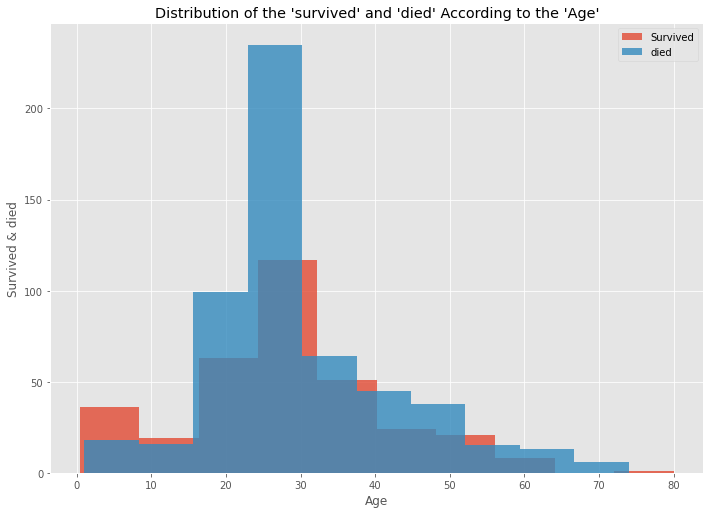

In [19]:
df.Age[survived].hist(alpha=0.8,label='Survived')
df.Age[died].hist(alpha=0.8,label='died');
plt.title("Distribution of the 'survived' and 'died' According to the 'Age'")
plt.xlabel('Age')
plt.ylabel('Survived & died')

plt.legend();                           

## Average male and female survivors :

In [20]:
df.groupby('Sex').Survived.mean()

Sex
female    0.740385
male      0.188908
Name: Survived, dtype: float64

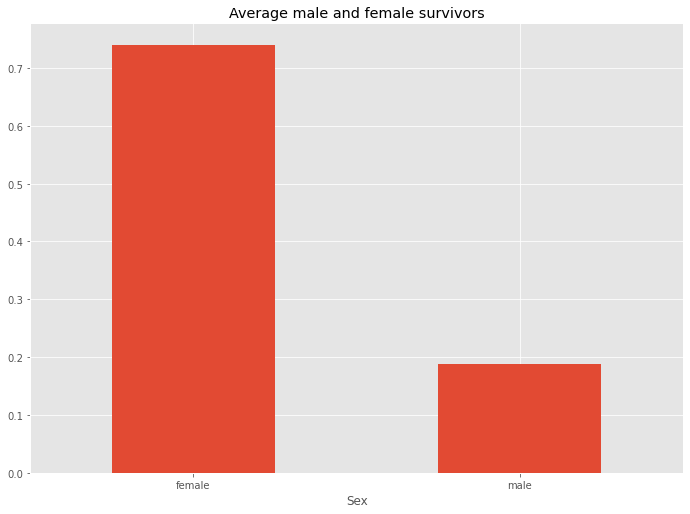

In [21]:
df.groupby('Sex').Survived.mean().plot(kind='bar').set(title="Average male and female survivors")
plt.xticks(rotation=0);

#### The total number of males and females:

In [22]:
df.Sex.value_counts()

male      577
female    312
Name: Sex, dtype: int64

In [23]:
df.groupby("Sex")['Pclass'].value_counts()

Sex     Pclass
female  3         144
        1          92
        2          76
male    3         347
        1         122
        2         108
Name: Pclass, dtype: int64

### Average  of the 'survived' According to the 'Pclass' and 'Sex' :

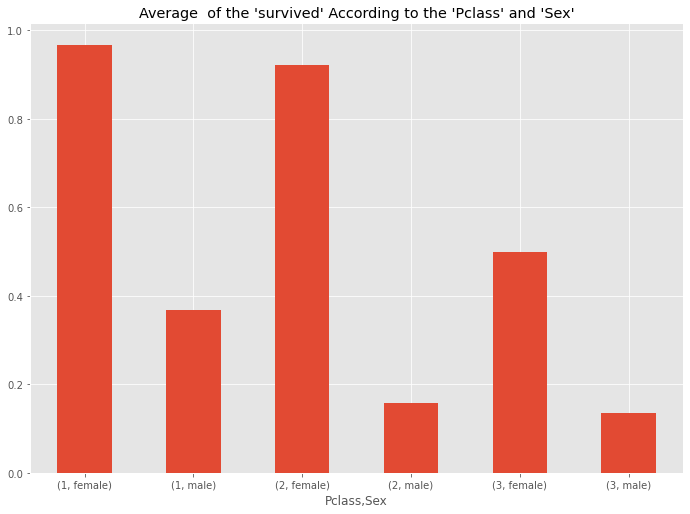

In [30]:
df.groupby(['Pclass','Sex']).Survived.mean().plot(kind="bar",label='Survived').set(title="Average  of the 'survived' According to the 'Pclass' and 'Sex'")
plt.xticks(rotation=0);


### Distribution of  ' survived ' and  ' died '   according to the " SibSp " :
##### siblings / spouses aboard the Titanic	

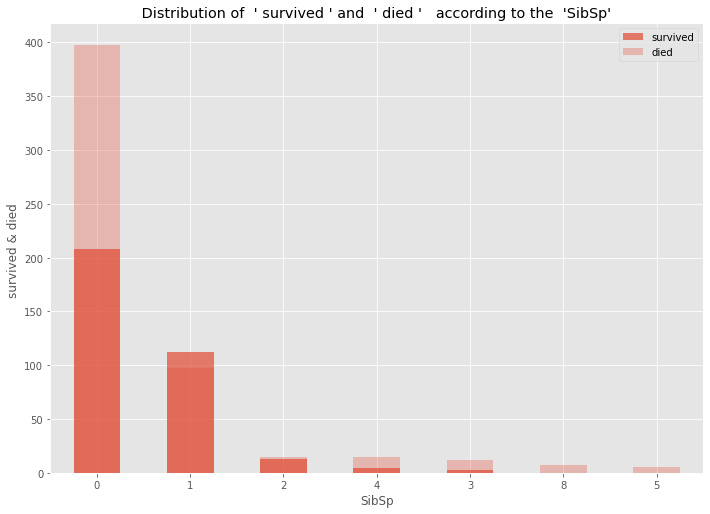

In [48]:
df.SibSp[survived].value_counts().plot(kind='bar',alpha=0.7,label="survived")
df.SibSp[died].value_counts().plot(kind='bar',alpha=0.3,label = "died")
plt.title(" Distribution of  ' survived ' and  ' died '   according to the  'SibSp' ")
plt.xlabel("SibSp")
plt.ylabel("survived & died ")
plt.xticks(rotation=0)
plt.legend();

### Distribution of  ' survived ' and  ' died '   according to the " Parch " :
#### of parents / children aboard the Titanic	

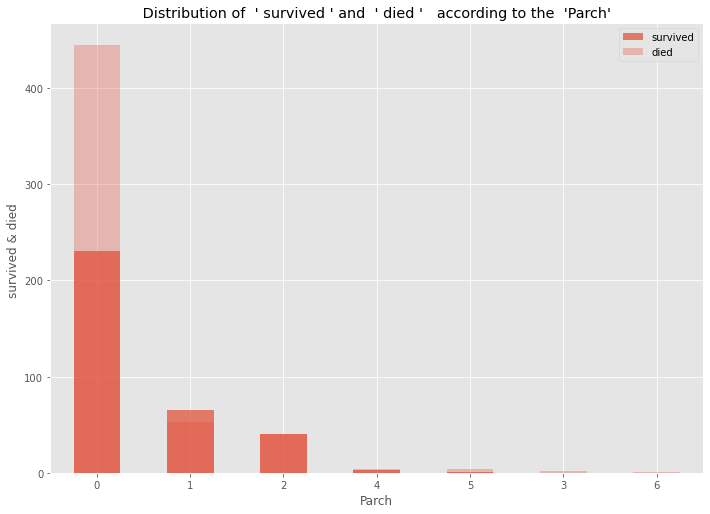

In [49]:
df.Parch[survived].value_counts().plot(kind='bar',alpha=0.7,label="survived")
df.Parch[died].value_counts().plot(kind='bar',alpha=0.3,label = "died")
plt.title(" Distribution of  ' survived ' and  ' died '   according to the  'Parch' ")
plt.xlabel("Parch")
plt.ylabel("survived & died ")
plt.xticks(rotation=0);

plt.legend();

### Distribution of  ' survived ' and  ' died '   according to the  'Embarked' :
####  Port of Embarkatio  C = Cherbourg, Q = Queenstown, S = Southampton


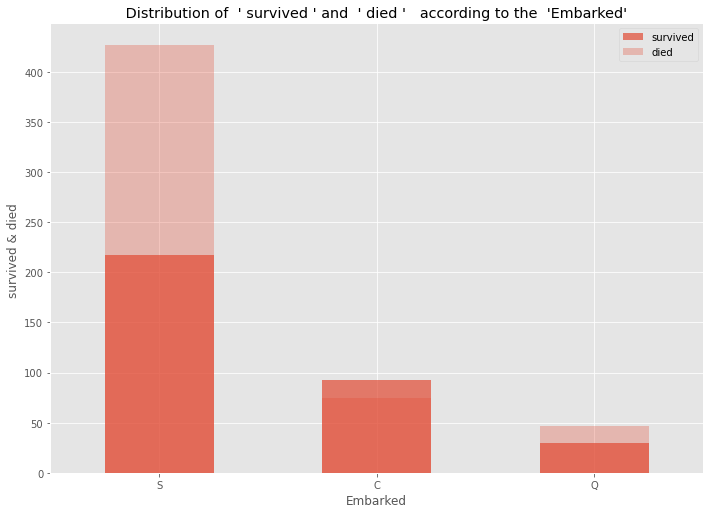

In [52]:
df.Embarked[survived].value_counts().plot(kind='bar',alpha=0.7,label="survived")
df.Embarked[died].value_counts().plot(kind='bar',alpha=0.3,label = "died")
plt.title(" Distribution of  ' survived ' and  ' died '   according to the  'Embarked' ")
plt.xlabel("Embarked")
plt.ylabel("survived & died ")
plt.xticks(rotation=0);

plt.legend();

### Conclusion
Our analysis suggests that social-economic status and sex are two major factors in survival. Being a female with upper social-economic standing would provide one the best chance to survive. On the other hand, being a man in the third class would give one very limited chance of survival. In addition, children and youth were more likely to survive compared to other age groups. Family size did not seem to be a dominant factor in survival. 